# Longitude Conventions and Data Subsetting
This notebook demonstrates how to handle longitude conventions (0–360 and -180–180 degrees) and how to subset spatial and temporal data using climatrix.

In [ ]:
import xarray as xr
import climatrix as cm
from climatrix.dataset.axis import AxisType

### ⬇️ Download DATASET first

1. You can either download first ERA5-Land directly from [CDS](https://cds.climate.copernicus.eu/datasets/reanalysis-era5-land?tab=overview) 
2. or use the `climatrix` CLI 

```bash
cm dataset config cds
```

and then

```bash
cm dataset download era5-land --year 2015 --month 10 --day 10 --hour 14 --target ./era5-land.nc
```

## Loading a Dataset

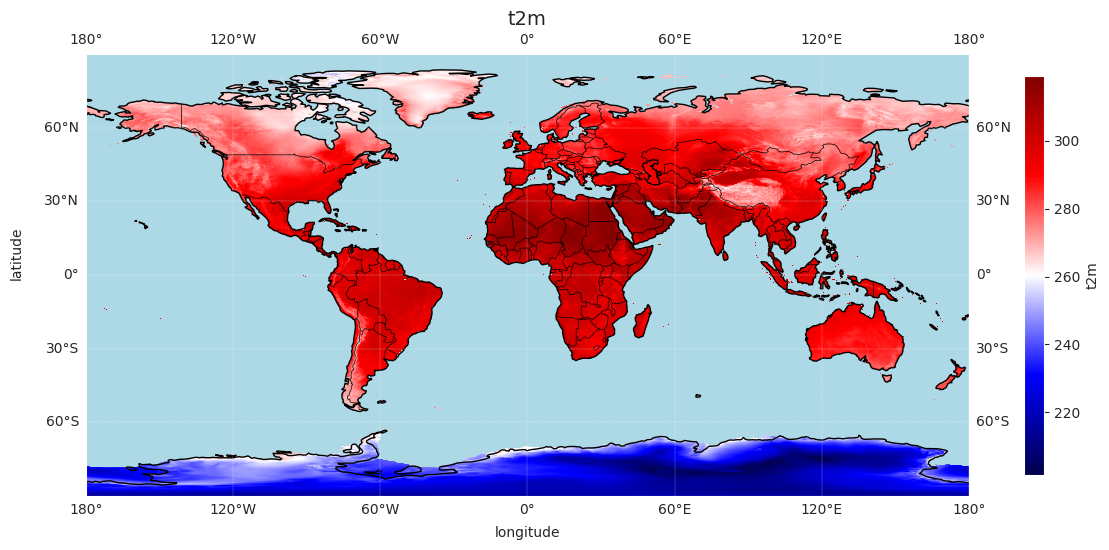

<GeoAxes: title={'center': 't2m'}>

In [3]:
xr_dset = xr.open_dataset("era5-land.nc")
dset = xr_dset.cm.to_signed_longitude()
dset.plot()

## Conversion of Longitude Conventions

In [4]:
cm_positive_conv = dset.to_positive_longitude()
print("\nConverted to positive longitude convention:")
print(cm_positive_conv.da.longitude.values)


cm_signed_conv = cm_positive_conv.to_signed_longitude()
print("Converted to signed longitude convention::")
print(cm_signed_conv.da.longitude.values)


Converted to positive longitude convention:
[1.000e-01 2.000e-01 3.000e-01 ... 3.598e+02 3.599e+02 0.000e+00]
Converted to signed longitude convention::
[-179.8 -179.7 -179.6 ...  179.9  180.  -179.9]


## Spatial Subsetting (`subset`)

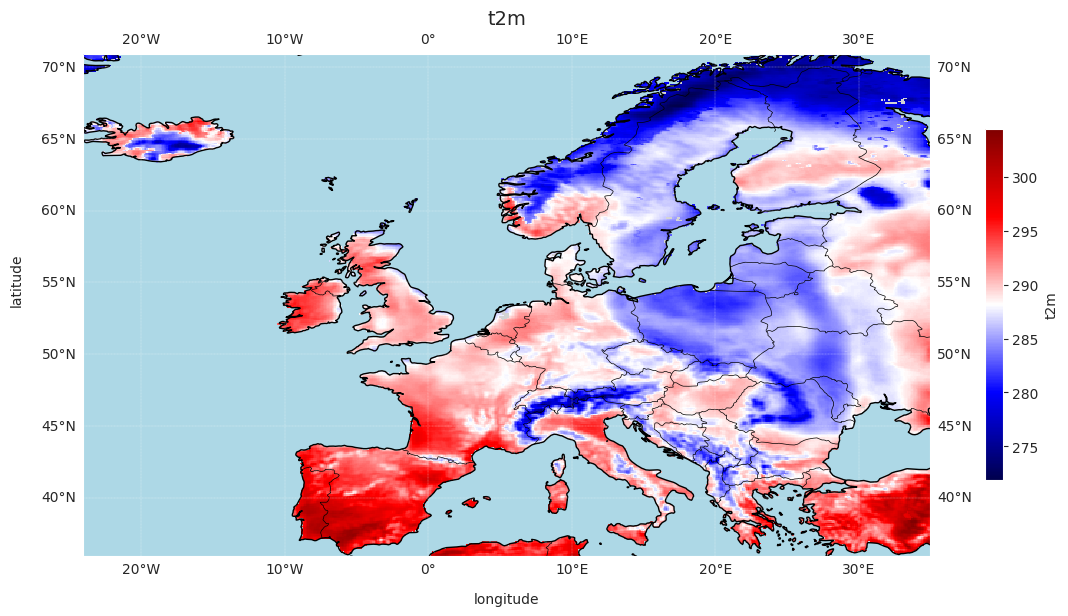

<GeoAxes: title={'center': 't2m'}>

In [5]:
cm_data_for_subset = dset
subset_result = cm_data_for_subset.subset(
    north=71, south=36, west=-24, east=35)

subset_result.plot()

## Generic Selections `sel` and `isel`
These methods allow the use of AxisType or axis names defined in climatrix for data selection.

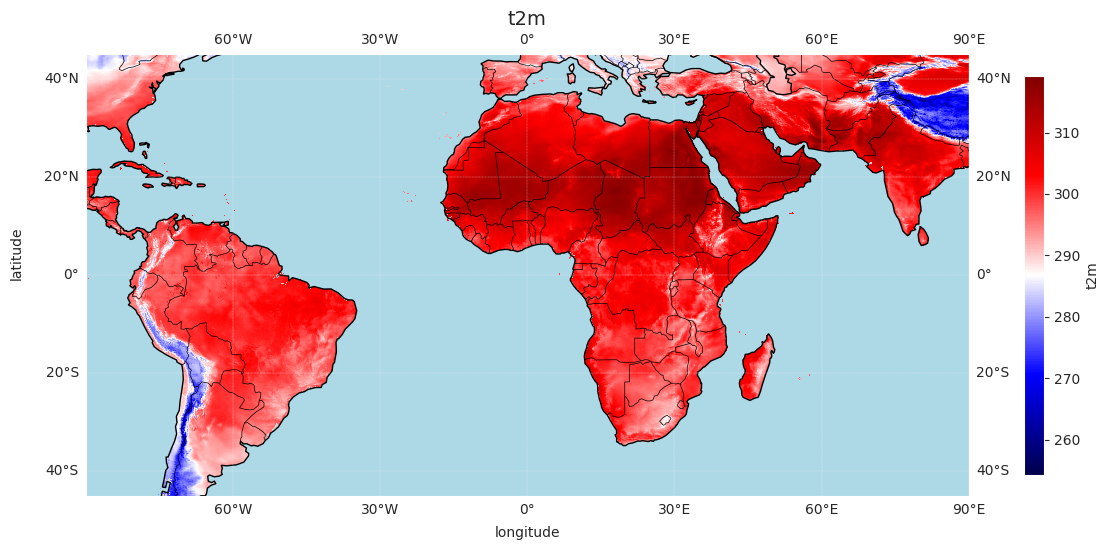

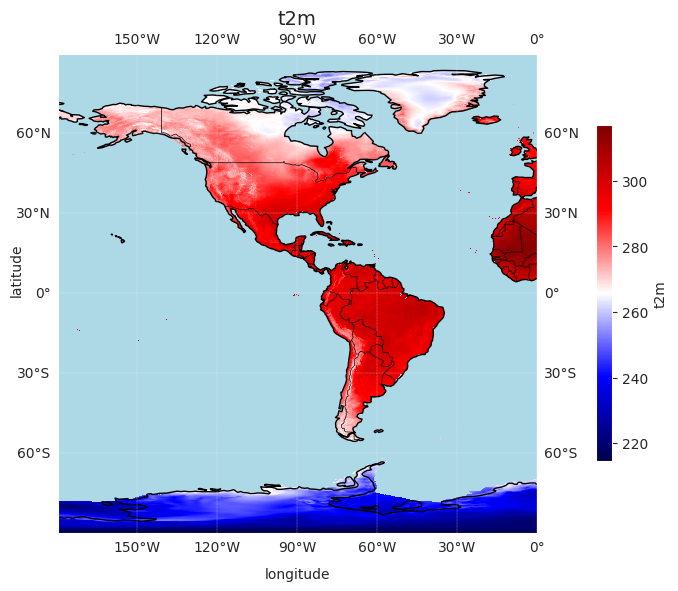

<GeoAxes: title={'center': 't2m'}>

In [8]:
sel_result = dset.sel({
    AxisType.LATITUDE: slice(45, -45),
    "longitude": slice(-90, 90),
})
sel_result.plot()


isel_result = dset.isel({
    'longitude': slice(0,1800)
})
isel_result.plot()